In [ ]:
# Import library functions
from tex2net import (
    create_character_graph, join_similar_nodes,
    summarize_t5,
    plot_character_centralities, detect_communities_and_plot,
    plot_community_interactions, describe_degree,
    analyze_temporal_relationships, analyze_graph_characteristics,
    detect_communities, calculate_degree_centrality,
    visualize_graph, visualize_pyvis_graph, visualize_directed_graph
)
import matplotlib.pyplot as plt
import networkx as nx

In [8]:
# Sample narrative text
text = """
Winston dislikes Big Brother.
Winston works for O'Brien.
O'Brien deceives Winston.
Winston loves Julia.
Julia loves Winston.
Julia opposes the Party secretly.
Winston writes in a diary.
Parsons asks Winston for help with tasks.
Charrington sells Winston a diary.
Charrington arrests Winston. 
Charrington arrests Julia.
The Thought Police capture Winston.
O'Brien tortures Winston.
Winston betrays Julia under torture.
”"""

# ------------------------------
# Step 1: Text Rewriting & Summarization
# ------------------------------

# Summarize text using T5-small
summary_text = summarize_t5(text)
print("\nSummarized Text (T5-small):")
print(summary_text)


Summarized Text (T5-small):
- verb - character form: Winston dislikes Big Brother. Winston works for O'Brien. Julia loves Winston. Julia opposes the Party secretly. Winston writes in a diary. Charrington sells Winston a diary. Charrington arrests Julia. The Thought Police capture Winston. Winston betrays Julia under torture.


In [9]:
# ------------------------------
# Step 2: Create the Character Graph
# ------------------------------

# Use the summary (or rewritten version) to create the graph.
graph, characters, relationships = create_character_graph(summary_text)
print("\nExtracted Characters:", characters)
print("Relationships:", relationships)

# Merge nodes with similar names for consistency.
graph = join_similar_nodes(graph, characters)




Extracted Characters: ['Winston', "O'Brien", 'Julia', 'Charrington']
Relationships: [['Winston', "O'Brien"], ['Julia', 'Winston'], ['Charrington', 'Winston'], ['Charrington', 'Julia'], ['Winston', 'Julia']]


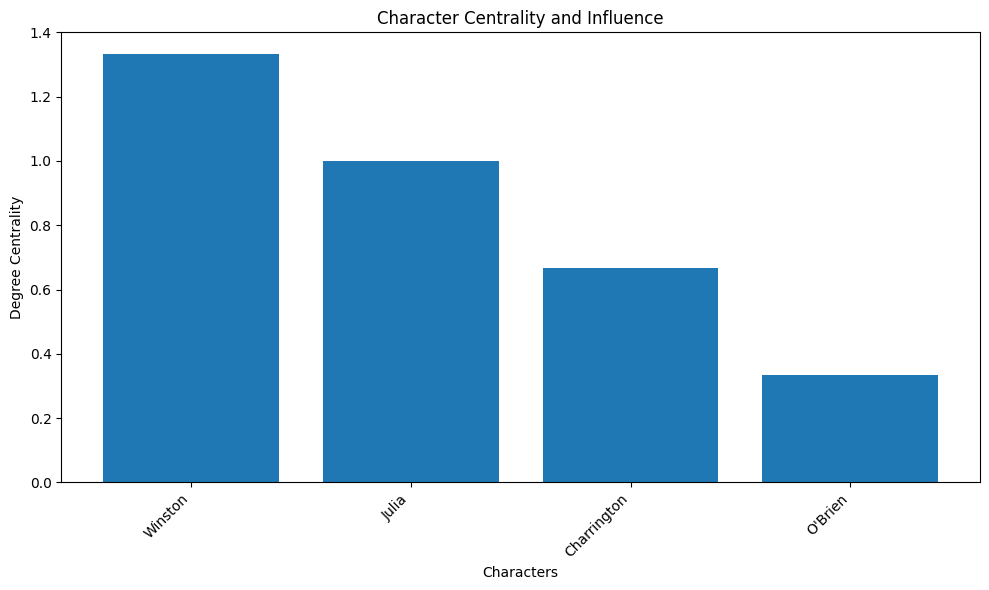

character_network_communities.html


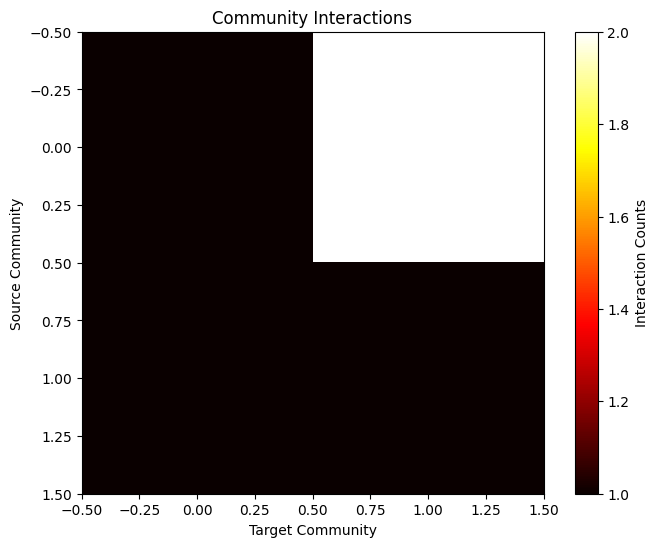

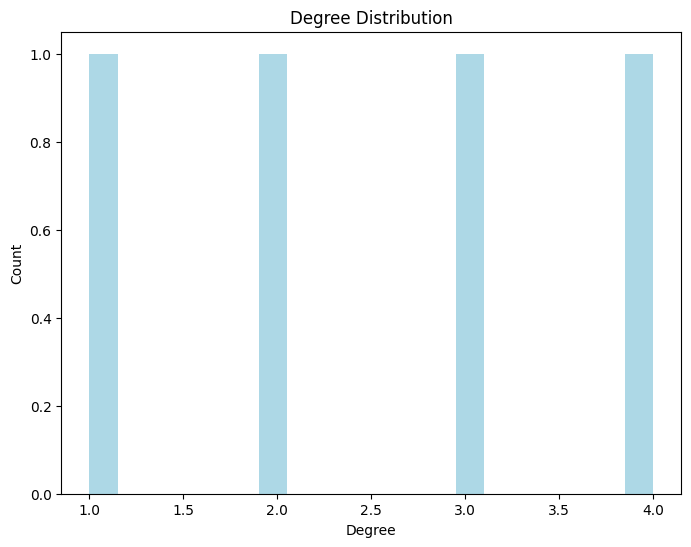

Temporal Relationship Analysis
-----------------------------
Average Temporal Distance: None
Density of Temporal Interactions: 0.4166666666666667
Reciprocity of the Graph: 0.4

Graph Characteristics:
Number of Nodes: 4
Number of Edges: 5
Average Degree: 2.5
Average Clustering Coefficient: 0.425

Detected Communities: {0: ['Winston', "O'Brien"], 1: ['Julia', 'Charrington']}
Degree Centrality: {'Winston': 1.3333333333333333, "O'Brien": 0.3333333333333333, 'Julia': 1.0, 'Charrington': 0.6666666666666666}


In [10]:
# ------------------------------
# Step 3: Network Analysis
# ------------------------------

# 3.1 Plot Character Centralities (Degree Centrality)
plot_character_centralities(graph)

# 3.2 Detect Communities and Visualize Them
partition = detect_communities_and_plot(graph)

# 3.3 Plot Community Interactions (Heatmap)
plot_community_interactions(graph, partition)

# 3.4 Describe Degree Distribution of the Graph
describe_degree(graph)

# 3.5 Analyze Temporal Relationships
analyze_temporal_relationships(graph)

# 3.6 Print Overall Graph Characteristics
analyze_graph_characteristics(graph)

# 3.7 Detect Communities (returning a dictionary)
communities = detect_communities(graph)
print("\nDetected Communities:", communities)

# 3.8 Calculate and Print Degree Centrality Values
degree_centrality = calculate_degree_centrality(graph)
print("Degree Centrality:", degree_centrality)

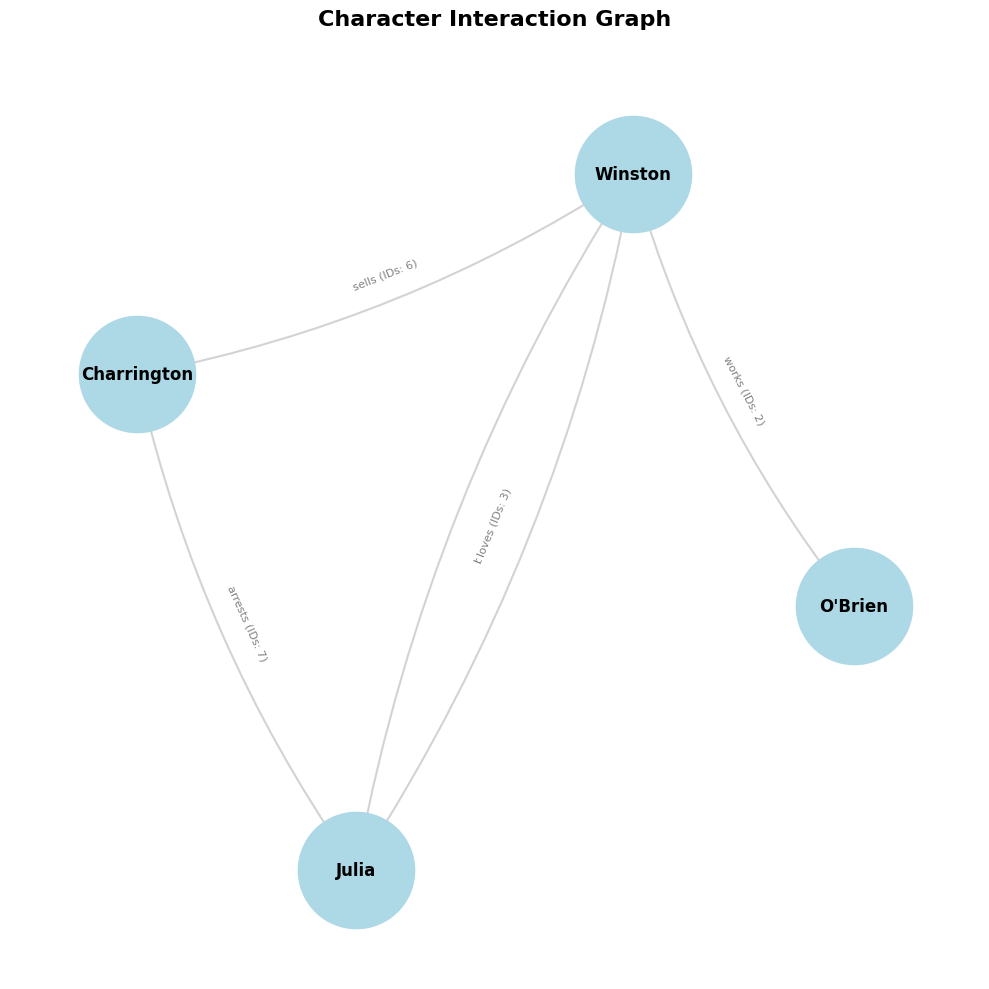

character_relationships.html


In [11]:
# ------------------------------
# Step 4: Visualization
# ------------------------------

# 4.1 Visualize the Graph using Matplotlib (Static Visualization)
visualize_graph(graph, title="Character Interaction Graph")

# 4.2 Visualize the Graph using Pyvis (Interactive HTML Visualization)
visualize_pyvis_graph(graph, output_file="character_relationships.html")



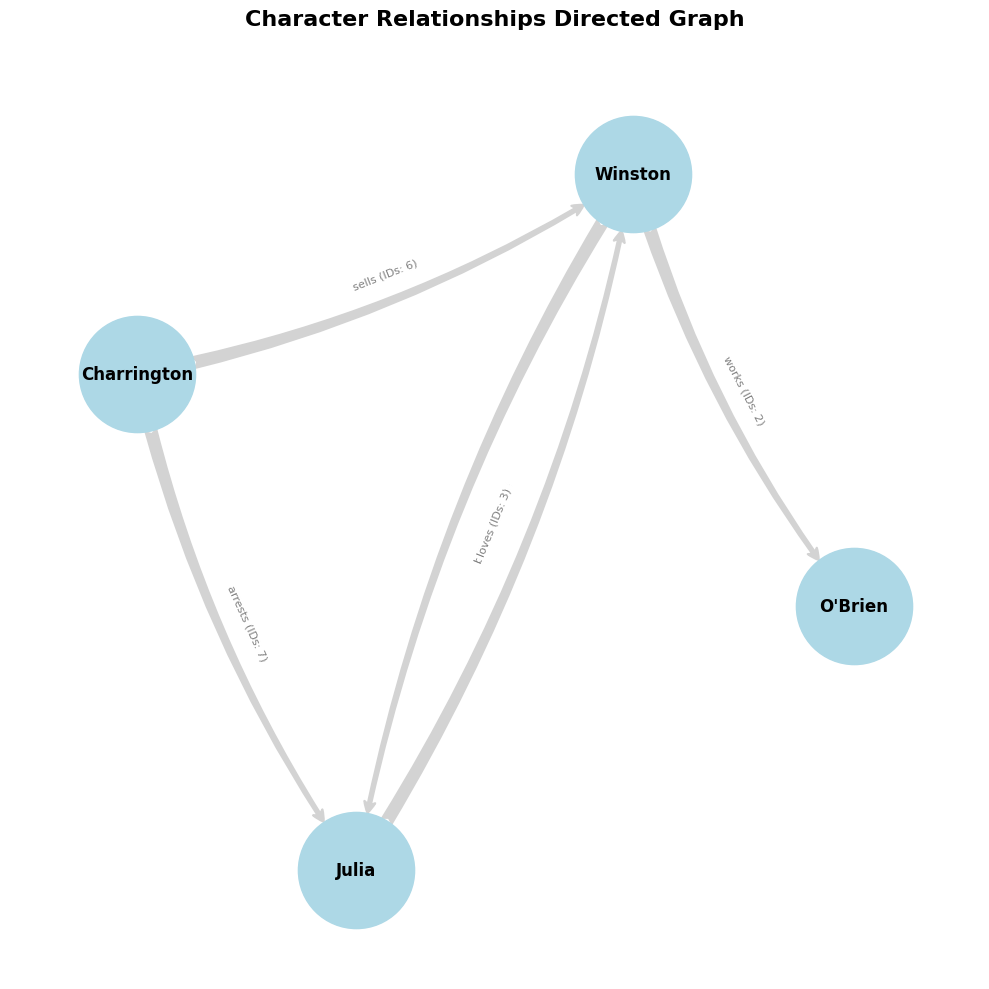

In [12]:
# 4.3 New: Directed Graph Visualization using our new function
visualize_directed_graph(graph, title="Character Relationships Directed Graph")

In [13]:
# ------------------------------
# Optional: Further Custom Analysis
# ------------------------------

# Example: Compute and print additional NetworkX metrics
print("\nAdditional NetworkX Metrics:")
print("Average Clustering Coefficient:", nx.average_clustering(graph))
print("Graph Density:", nx.density(graph))


Additional NetworkX Metrics:
Average Clustering Coefficient: 0.425
Graph Density: 0.4166666666666667
